----
# Wprowadzenie - część 1
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

## 0. Zagadnienia do opanowania przed zajęciami
### 0.1. Zapoznanie z podstawami językiem programowania *Python*
https://www.w3schools.com/python/python_intro.asp  
### 0.2. Zapoznanie z postawami biblioteki *numpy*
https://www.w3schools.com/python/numpy_intro.asp  
https://numpy.org/devdocs/user/quickstart.html  
### 0.3. Zapoznanie z postawami biblioteki *sympy*
https://docs.sympy.org/latest/tutorial/index.html
### 0.4. Przydatne informacje:
Funkcje z biblioteki *numpy* potrzebne do zrealizowania ćwiczenia:  
`numpy.linspace, numpy.sin, numpy.min, numpy.max, numpy.random.uniform, numpy.random.normal, numpy.poly1d, numpy.polymul, numpy.polyder, numpy.polyval`  
Dokumentacja i opisy poszczególnych funkcji *numpy*:  
https://numpy.org/doc/stable/reference/    

Funkcje z biblioteki *matplotlib* potrzebne do zrealizowania ćwiczenia:  
`matplotlib.pyplot.figure, matplotlib.pyplot.plot, matplotlib.pyplot.xlabel, matplotlib.pyplot.ylabel, matplotlib.pyplot.grid, atplotlib.pyplot.axis, matplotlib.pyplot.subplot`  
Dokumentacja i opisy poszczególnych funkcji *matplotlib*:  
https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot




In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy
default_figsize=(14, 8)

----
## 1. Rysowanie wykresów
----
### Zadanie: Narysuj wykres jednego okresu funkcji $f(\omega) = sin(\omega + \frac{\pi}{4})$
* zmień kolor wykresu
* dodaj opisy osi i tytuł wykresu
* zastosuj 10% marginesy

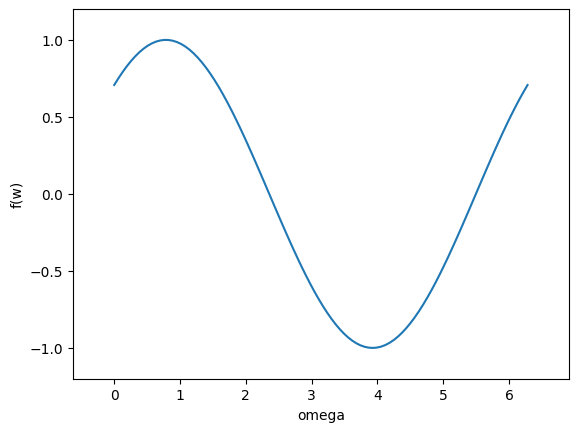

In [2]:
def introduction_plot_sinus():
    #narysuj wykres  
    omega=np.linspace(0,2*np.pi,100)
    fun=np.sin(omega+np.pi/4)
    #dodaj opisy osi i tytuł wykresu    
    figl=plt.figure()
    plt.plot(omega,fun)
    plt.xlabel("omega")
    plt.ylabel("f(w)")
    #zastosować 10% marginesy
    plt.margins(0.1)
    #lub plt.axis(omega_min-omega.margines,) i to samo dla y ale trzeba zdefiniować min itp
    return
    
introduction_plot_sinus()

----
## 2. Podział okna wykresu
----
### Zadanie: Używając „subplot” narysuj wykres 3 funkcji w następujący sposób:
(dla x w zakresie $<-0,2\pi>$)
<table>
  <tr>
    <td colspan="2" bgcolor="blue" width="200" height="100" style="color: white; text-align:center">sin(x)</td>
  </tr>
  <tr>
    <td bgcolor="red" width="100" height="100" style="color: white; text-align:center">cos(x)</td>
    <td bgcolor="green" width="100" height="100" style="color: white; text-align:center">arctan(x)</td>
  </tr>
</table>

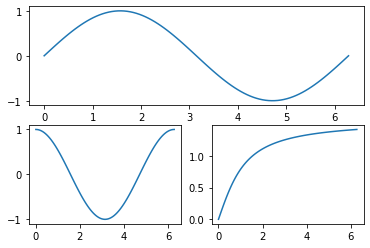

In [3]:
def introduction_plot_subplot():
    #narysuj wykres
    x=np.linspace(0,2*np.pi,100)
    f1=np.sin(x)   
    f2=np.cos(x)
    f3=np.arctan(x)
    figl=plt.figure()
    plt.subplot(2,2,(1,2))
    plt.plot(x,f1)
    plt.subplot(2,2,3)
    plt.plot(x,f2)
    plt.subplot(2,2,4)
    plt.plot(x,f3)
    
    return
    
introduction_plot_subplot()

---- 
## 3. Operacje na wielomianach
---- 
### Dla zdefiniowanych wielomianów:  
$ a(x) = x^4 + x^3 - x^2 - 1 $  
$ b(x) = x^3 - x + 1 $  
$ c(x) = x^5 - x^4 + x^3 - 1 $  
### Wylicz:  
$ d(x) = a(x) \cdot c(x)$  
$ e(x) = \frac{\partial d(x)}{\partial x}$  
$ f(x) = e(x) + b(x) - x^{3}$  
### Narysuj wykres wielomianu $f(x)$ dla $x\in<-1,1>$


   4     3     2
1 x + 1 x - 1 x + 1


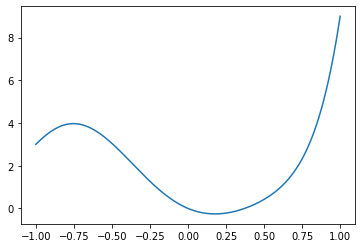

In [4]:
def introduction_plot_polynomial():
    #wykonaj operacje na wielomianach
    a=np.poly1d([1,1,-1,0,1],variable='x')
    b=np.poly1d([1,0,-1,1],variable='x')
    c=np.poly1d([1,-1,1,0,0,-1],variable='x')
    d=a*b
    e=np.polyder(d)
    f=e+b+np.poly1d([-1,0,0,0])
    
    #wyświetl wielomiany
    print(a)
    
    #narysuj wykres
    x=np.linspace(-1,1,1000)
    y=f(x)
    figl=plt.figure()
    plt.plot(x,y)
    
    
    return

introduction_plot_polynomial()

---- 
## 4. Sympy - moduł obliczeń symbolicznych
---- 
Funkcje z biblioteki sympy potrzebne do zrealizowania ćwiczenia:  
* deklaracja zmienej symbolicznej `t = sympy.Symbol('t')`, opcjonalnie z dodatkowymi atrybutami np. `t = sympy.Symbol('t', real=True)`.  
* wyznaczanie całki nieoznaczonej  $\int x^2 dx$ `sympy.integrate(x**2, x)`  
* wyznaczanie całki oznaczonej $\int_{a}^{b} x^2 dx$ `sympy.integrate(x**2, (x, a, b))`  
* wyświetlanie sformatowanego wyniku `display(  )`  
  
Wyznacz $\int t^2 dt$ oraz $\int_{-1}^{1} t^2 dt$ i wyświetl wyniki.

In [7]:
import sympy
def introduction_symbolic():
    
    #zadeklaruj zmienną t
    t=sympy.Symbol('t',real=True)
    
    #wyznacz i wyświetl całkę nieoznaczoną
    a=sympy.integrate(t**2, t)
    display(a)

        
    #wyznacz i wyświetl całkę oznaczoną
    #ind2=sympy.integrate(t**2, (t, -1, 1))
        
    return

introduction_symbolic()

t**3/3

----
## 5. Rozkłady statystyczne (zadanie dodatkowe)
----
### Zadanie: Wygeneruj wektor 100 000 elementów i wykreśl histogram składający się z 50 przedziałów
* wartości o rozkładzie równomiernym <-1; 1> 
* wartości o rozkładzie normalnym µ=0, σ=0.5

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.pyplot.axis
def introduction_plot_histogram():
    #wygeneruj wektory elementów
    uniform=np.random.uniform(-1,1,size=100000)  #uniform to zmienna
    normal=np.random.normal(0,0.5,size=100000) # normal to zmienna
    #narysuj histogramy
    fig,axs=plt.subplots(2,1,figsize=default_figsize,dpi=80) # dwa wiersze jedna koumna
    axs[0].hist(uniform,bins=50) #pierwszy wykres ma bys histogramem o 
    axs[1].hist(normal,50)
    return    
    
introduction_plot_histogram()

---- 
## 6. THE END
---- 